# Sensitivity of Fold-Change to $F$

© 2019 Griffin Chure. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

--- 

In [1]:
import sys
sys.path.insert(0, '../../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mut.thermo
import mut.viz
pboc = mut.viz.color_selector('pboc')
constants = mut.thermo.load_constants()
mut.viz.plotting_style()

In my analysis, I have found that at the extremes of fold-change the $\Delta F$ is poorly resolved and has aninteresting trend towards $\Delta F = 0$. I think this has something to do with the fact that when you approach the asymptotes of fold-change, the magnitude of the empirical $F$ gets very large. As a reminder, the empirical $F$ can be calculated from the fold-change data as

$$
F_\text{empirical} = \log \left( {1 \over \text{fold-change}} -1\right)
$$

Text(0, 0.5, 'fold-change')

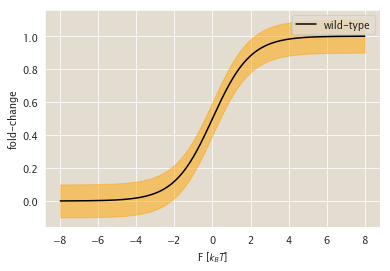

In [75]:
bohr_param_wt = np.linspace(-8, 8, 1000)
bohr_param_mut = bohr_param_wt - 2
delta = 0.1
fc_wt = (1 + np.exp(-bohr_param_wt))**-1
fc_ref_min = (1 + np.exp(-bohr_param_wt))**-1 - delta
fc_ref_max = (1 + np.exp(-bohr_param_wt))**-1 + delta
fc_mut_min = (1 + np.exp(-bohr_param_mut))**-1 - delta
fc_mut_max = (1 + np.exp(-bohr_param_mut))**-1 + delta

plt.plot(bohr_param_wt, fc_wt, 'k-', label='wild-type') 
plt.fill_between(bohr_param_wt, fc_ref_min, fc_ref_max, color='orange', alpha=0.5)                
plt.legend()
plt.xlabel('F [$k_BT$]')
plt.ylabel('fold-change')


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


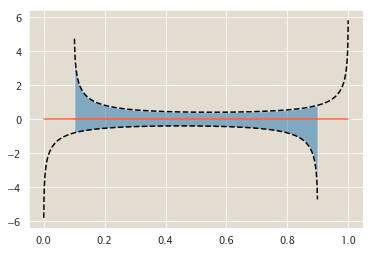

In [85]:
err_df_min = np.log(1 - (1 / ((fc_wt / delta) + 1)) * (1 / (1 - fc_wt)))
err_df_max = np.log(1 + (1 / ((fc_wt / delta) - 1)) * (1 / (1 - fc_wt)))
df_min = bohr_param_wt + np.log((1/fc_ref_min) - 1)
df_max = bohr_param_wt + np.log((1/fc_ref_max) - 1)
plt.fill_between(fc_wt, df_min, df_max, alpha=0.5)
plt.plot(fc_wt, df_min - err_df_max, '-', color='tomato')
plt.plot(fc_wt, df_max - err_df_min, '-', color='tomato')
plt.plot(fc_wt, df_min, '--', color='k')
plt.plot(fc_wt, df_max, '--', color='k')
# plt.plot(fc_ref_min, df - obs_ddf, '--', color='k')


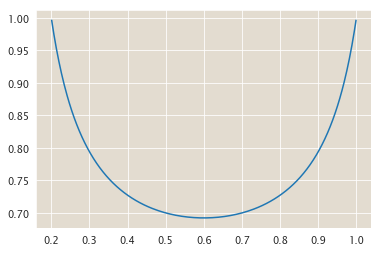

In [100]:
plt.plot(fc_ref_max, (1 / (1 + np.exp(err_df_min - err_df_max))))
# plt.plot(fc_ref_min, 1 / (1 + np.exp(err_df_max)))